In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_digits

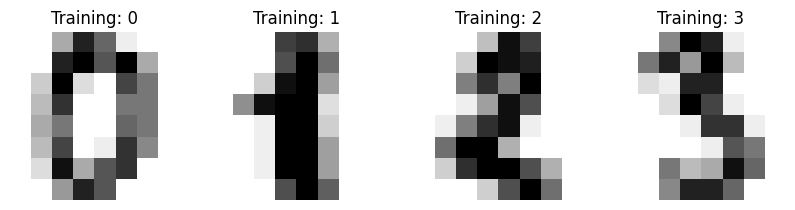

In [13]:
df = load_digits()
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, images, label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(images,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [14]:
df.images.shape

(1797, 8, 8)

In [15]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
df.images[0].shape

(8, 8)

In [17]:
len(df.images)

1797

In [18]:
n_sample = len(df.images)
data = df.images.reshape((n_sample,-1))

In [19]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
data[0].shape

(64,)

In [21]:
data.shape

(1797, 64)

In [22]:
data.min()

0.0

In [23]:
data.max()

16.0

In [25]:
data = data/16

In [26]:
data.min()

0.0

In [27]:
data.max()

0.0625

In [28]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.25)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf=RandomForestClassifier()

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
y_pred

array([0, 3, 0, 4, 8, 9, 6, 1, 5, 3, 9, 8, 7, 2, 4, 2, 5, 6, 5, 1, 8, 4,
       9, 2, 6, 5, 5, 3, 1, 0, 6, 0, 3, 7, 2, 4, 8, 4, 2, 5, 1, 1, 6, 4,
       9, 9, 9, 0, 1, 4, 0, 8, 5, 0, 1, 6, 0, 1, 7, 9, 5, 7, 8, 5, 9, 2,
       8, 9, 7, 2, 9, 8, 6, 3, 4, 9, 6, 5, 7, 8, 5, 8, 6, 0, 4, 1, 8, 2,
       5, 8, 1, 7, 4, 7, 1, 9, 1, 0, 0, 5, 9, 9, 8, 8, 3, 3, 5, 8, 2, 5,
       2, 7, 4, 9, 9, 1, 3, 4, 7, 7, 7, 7, 0, 6, 3, 4, 8, 4, 0, 7, 6, 3,
       0, 2, 1, 5, 2, 9, 0, 6, 9, 3, 7, 4, 2, 8, 8, 6, 6, 6, 5, 8, 9, 4,
       4, 7, 1, 9, 3, 5, 1, 9, 5, 1, 2, 2, 0, 2, 9, 5, 0, 5, 0, 2, 3, 1,
       9, 9, 3, 8, 8, 7, 5, 2, 2, 0, 2, 6, 4, 1, 4, 4, 2, 8, 7, 5, 3, 4,
       1, 3, 2, 7, 3, 7, 7, 8, 5, 0, 8, 2, 6, 9, 7, 8, 5, 9, 2, 5, 8, 3,
       8, 4, 6, 3, 3, 2, 5, 2, 9, 9, 3, 4, 2, 5, 8, 2, 6, 9, 5, 4, 0, 5,
       2, 7, 1, 1, 7, 3, 3, 4, 6, 2, 3, 9, 3, 6, 7, 4, 8, 7, 3, 0, 7, 9,
       7, 3, 5, 6, 9, 6, 6, 0, 0, 9, 6, 2, 8, 1, 8, 6, 7, 3, 9, 2, 1, 1,
       4, 1, 8, 5, 5, 3, 4, 3, 7, 5, 6, 3, 6, 8, 1,

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
confusion_matrix(y_test,y_pred)

array([[33,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  1,  1,  0,  1, 46,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 46]])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.96      1.00      0.98        43
           2       0.98      1.00      0.99        51
           3       0.98      0.95      0.97        44
           4       0.93      1.00      0.96        41
           5       0.94      1.00      0.97        50
           6       1.00      0.96      0.98        48
           7       0.95      1.00      0.97        37
           8       0.98      0.87      0.92        53
           9       0.96      0.94      0.95        49

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

